In [1]:
!python -m pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install kagglehub[pandas-datasets]>=0.3.8 geopy

In [3]:
import kagglehub
import zipfile
import os
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [4]:
class Pad_clase:
    def __init__(self):
        pass

    def download_dataset_zip(self,url = ""):
        print("Descargando dataset desde Kaggle...")
        dataset_path = kagglehub.dataset_download(url)
        print("Ruta al dataset:", dataset_path)
        return dataset_path

    def extract_zip_files(self,dataset_path):
        zip_files = [f for f in os.listdir(dataset_path) if f.endswith('.zip')]
        if zip_files:
            zip_file = os.path.join(dataset_path, zip_files[0])
            extract_dir = os.path.join(dataset_path, "extracted")
            os.makedirs(extract_dir, exist_ok=True)
            print(f"Extrayendo {zip_file} en {extract_dir}...")
            with zipfile.ZipFile(zip_file, "r") as z:
                z.extractall(extract_dir)
            return extract_dir
        else:
            # Si no se encuentra un ZIP, se verifica si existen archivos CSV en la ruta
            csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
            if csv_files:
                print("No se encontró archivo ZIP pero se detectaron archivos CSV; se asume que el dataset ya se encuentra extraído.")
                return dataset_path
            else:
                raise FileNotFoundError("No se encontró ningún archivo .zip ni archivos .csv en la ruta del dataset")

    def create_csv(self,csv_dir):
        #os.makedirs('src/static/csv', exist_ok=True)
        csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]
        if not csv_files:
            raise FileNotFoundError("No se encontraron archivos CSV en el directorio extraído")

        for file in csv_files:
            file_path = os.path.join(csv_dir, file)
            print(f"Leyendo {file_path}...")
            try:
                df = pd.read_csv(file_path, encoding="latin1")
            except Exception as e:
                print(f"Error al leer {file}: {e}")
                continue
            print(f"Creando/actualizando ")
        print("cvs creado correctamente en ")
        return df

    def columna_regex(self,df_datos =pd.DataFrame(), reg = r"",columna ="",n_columnas = []):
        df = df_datos.copy()
        df[n_columnas] = df[columna].str.extract(reg).astype(int)
        return df

    def limpieza_nan_null(self,df_datos =pd.DataFrame(), name_col="", reemplezar=""):
        if df_datos[name_col].isnull().sum()>0:
            df = df_datos.copy()
            df[name_col]=df[name_col].fillna(reemplezar)
            print("cantidad antes {}/{}  despues {}/{} ".format(df_datos[name_col].isnull().sum(),len(df_datos),df[name_col].isnull().sum(),len(df)))
            return df
        print("no hay nulos")
        return df_datos
            #df_n["Company Profile"]=df_n["Company Profile"].fillna('{"Sector":"","Industry":""}')

In [5]:
padclase = Pad_clase()
dataset_path = padclase.download_dataset_zip("miadul/tuberculosis-x-ray-dataset-synthetic")
csv_dir = padclase.extract_zip_files(dataset_path)
df = padclase.create_csv(csv_dir)

Descargando dataset desde Kaggle...


100%|██████████| 258k/258k [00:00<00:00, 39.4MB/s]

Extracting files...
Ruta al dataset: /root/.cache/kagglehub/datasets/miadul/tuberculosis-x-ray-dataset-synthetic/versions/1
No se encontró archivo ZIP pero se detectaron archivos CSV; se asume que el dataset ya se encuentra extraído.
Leyendo /root/.cache/kagglehub/datasets/miadul/tuberculosis-x-ray-dataset-synthetic/versions/1/tuberculosis_xray_dataset.csv...
Creando/actualizando 
cvs creado correctamente en 


Realizar limpieza (Nulos o NaNs o Vacios , Caracteres espaciales)

In [6]:
!pip install matplotlib

Casos normales: 14082
Casos de tuberculosis: 5918


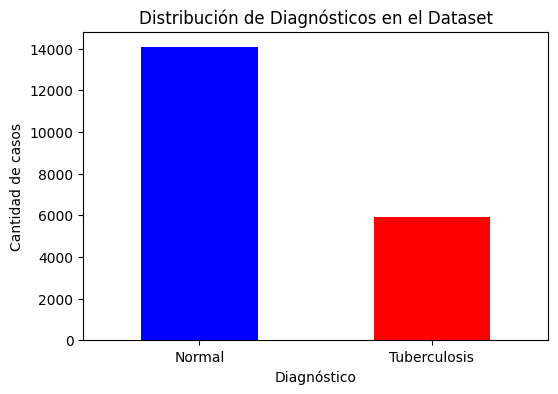

In [8]:
import matplotlib.pyplot as plt

class_counts = df['Class'].value_counts()

normal_count = class_counts.get('Normal', 0)
tb_count = class_counts.get('Tuberculosis', 0)
print(f'Casos normales: {normal_count}')
print(f'Casos de tuberculosis: {tb_count}')

plt.figure(figsize=(6,4))
class_counts.plot(kind='bar', rot=0, color=['blue', 'red'])
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad de casos')
plt.title('Distribución de Diagnósticos en el Dataset')
plt.show()

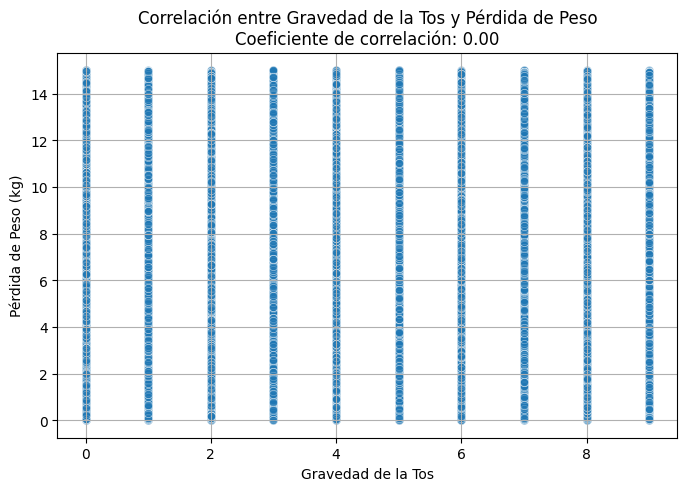

np.float64(0.003430889794189121)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

x = df["Cough_Severity"]
y = df["Weight_Loss"]

correlation = x.corr(y)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=x, y=y, alpha=0.6)
plt.title(f'Correlación entre Gravedad de la Tos y Pérdida de Peso\nCoeficiente de correlación: {correlation:.2f}')
plt.xlabel("Gravedad de la Tos")
plt.ylabel("Pérdida de Peso (kg)")
plt.grid(True)
plt.show()

correlation